# HW 1

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [32]:
diamonds_df = pd.read_csv('diamonds.csv')

In [33]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


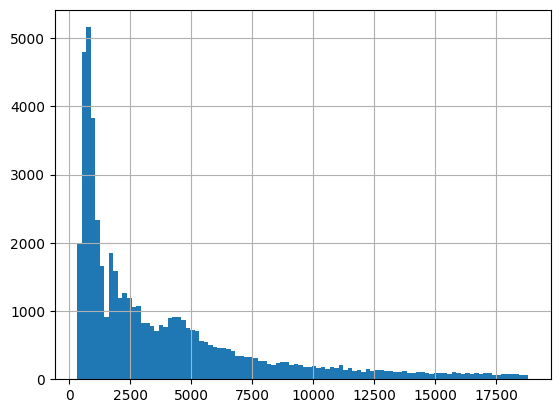

In [34]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [35]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [36]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [37]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [38]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [41]:
reg = LinearRegression().fit(X_train, y_train)

In [42]:
y_pred = reg.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)  
print(f"The Mean Squared Error is: {mse}") 
print(f"RMSE: {np.sqrt(mse)}") 


The Mean Squared Error is: 1477039.7083793418
RMSE: 1215.3352246929


In [13]:
score = r2_score(y_pred, y_test)

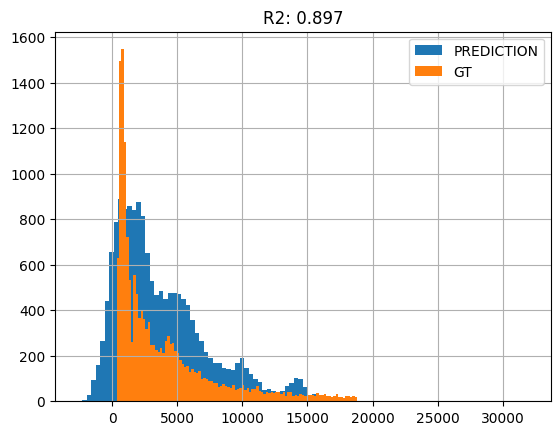

In [14]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [14]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent.
    """

    def __init__(self, learning_rate=0.0001, n_iter=1000):
        """
        Конструктор класса.

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self._coef = None
        self._intercept = None

    def _initialize_parameters(self, n_features):
        #начальные значения параметров
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

    def _compute_gradients(self, X, y, y_pred):
        #вычисление градиентов
        n_samples = X.shape[0]
        error = y_pred - y
        grad_coef = (2 / n_samples) * np.dot(X.T, error)
        grad_intercept = (2 / n_samples) * np.sum(error)

        return grad_coef, grad_intercept

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке.

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_samples, n_features = X.shape

        self._initialize_parameters(n_features)

        for i in range(self.n_iter):
            y_pred = np.dot(X, self.coef_) + self.intercept_

            #вычисление градиента
            grad_coef, grad_intercept = self._compute_gradients(X, y, y_pred)

            #обновление параметров
            self.coef_ -= self.learning_rate * grad_coef
            self.intercept_ -= self.learning_rate * grad_intercept

        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели.

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return np.dot(X, self.coef_) + self.intercept_

    def get_params(self):
        """
        Возвращает обученные параметры модели.
        """
        return {
            'weights': self.coef_.copy(),
            'bias': self.intercept_,
            'learning_rate': self.learning_rate,
            'n_iter': self.n_iter
        }


In [15]:
print(f"X shape: {X_train.shape}")
y_train = y_train.ravel()
y_test = y_test.ravel()
print(f"y shape: {y_train.shape}")

X shape: (37758, 9)
y shape: (37758,)


In [104]:
reg_new = LinearRegressorGD().fit(X_train, y_train)


In [105]:
y_pred_new=reg_new.predict(X_test)
print(reg_new.get_params())

{'weights': array([256.94871859, -12.60931798, 109.33723255, -57.34943729,
       -83.00995482,  19.90802303, 564.37069216, 557.65113445,
       345.23914711]), 'bias': np.float64(-1.4064509805541803), 'learning_rate': 0.0001, 'n_iter': 1000}


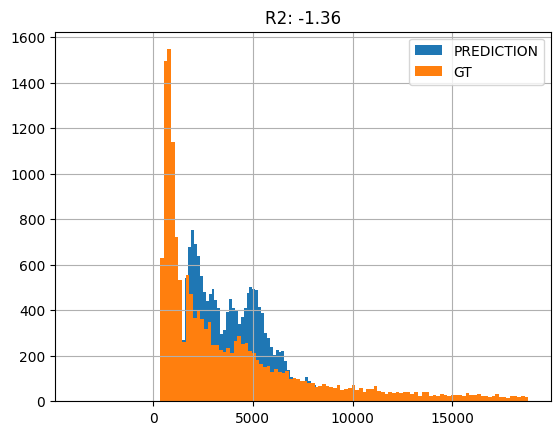

In [106]:
score = r2_score(y_pred_new, y_test)
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred_new.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();


# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [ ]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = []
        self.biases = []
        self.loss_history = []

    def _sigmoida(self, x):
        return (1/(1+np.exp(-x)))

    def _sigmoida_derivative(self, x):
        return x*(1-x)

    def _compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def _initialize_parameters(self, n_features):
        self.weights = []
        self.biases = []
        layer_sizes = [n_features]+list(self.hidden_layer_sizes)+[1]
        for i in range(len(layer_sizes)-1):
            self.weights.append(np.random.randn(
                layer_sizes[i], layer_sizes[i + 1]) * 0.1)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        layer_outputs = [X]
        layer_inputs = []
        current_output = X

        for i in range(len(self.weights) - 1):
            layer_input = np.dot(
                current_output, self.weights[i]) + self.biases[i]
            layer_inputs.append(layer_input)

            current_output = self._sigmoida(layer_input)
            layer_outputs.append(current_output)

        layer_input = np.dot(
            current_output, self.weights[-1]) + self.biases[-1]
        layer_inputs.append(layer_input)
        output = layer_input
        layer_outputs.append(output)

        return output, layer_outputs, layer_inputs

    def backward(self, X, y, layer_outputs, layer_inputs):
        n_samples = X.shape[0]
        weight_gradients = [np.zeros_like(w) for w in self.weights]
        bias_gradients = [np.zeros_like(b) for b in self.biases]

        error = layer_outputs[-1] - y.reshape(-1, 1)
        delta = error

        for i in range(len(self.weights) - 1, -1, -1):
            weight_gradients[i] = np.dot(layer_outputs[i].T, delta) / n_samples
            bias_gradients[i] = np.sum(
                delta, axis=0, keepdims=True) / n_samples

            if i > 0:
                delta = np.dot(
                    delta, self.weights[i].T) * self._sigmoida_derivative(layer_outputs[i])

        return weight_gradients, bias_gradients

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = np.array(X)
        y = np.array(y)
        y = y.ravel()
        self._initialize_parameters(X.shape[1])

        for epoch in range(self.n_iter):
            output, layer_outputs, layer_inputs = self.forward(X)
            loss = self._compute_loss(y, output.flatten())
            self.loss_history.append(loss)

            weight_grads, bias_grads = self.backward(
                X, y, layer_outputs, layer_inputs)

            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * weight_grads[i]
                self.biases[i] -= self.learning_rate * bias_grads[i]

        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X

        """
        X = np.array(X)
        output, _, _ = self.forward(X)
        return output.flatten()


In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(10, 5),  
    learning_rate=0.01,
    n_iter=500
    )

In [18]:
mlp.fit(X_train, y_train)

In [19]:
y_pred = mlp.predict(X_test)

In [ ]:
test_loss = mlp._compute_loss(y_test, y_pred)
print(f"Test MSE: {test_loss:.6f}")
print(f"Test RMSE: {np.sqrt(test_loss):.6f}")


Test MSE: 15897462.590629
Test RMSE: 3987.162223
